# WeatherPy
----

### Analysis
* The temperature of cities located North of the equator experience lower temperatures compared to cities located South of the equator. In addition, the futher away North the city is from the equator, the lower the temperature is. 
* Based on this information, there appears to be no correlation with the city's cloudiness factor and its' latitude. There also appears to be no correlation with the wind speed a city expereinces and the latitude of the city. 
* There appears to be no correlation with a city's humidity and its' latitude. However, most cities appear to experience 50% or more humidity.

---


In [2]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
import json

#import API key
from api_keys import api_key

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output file (CSV)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
#list for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls

In [4]:
#create an empty list
city_weather = []

#create a counter and set it to 0 to number each city 
counter = 0

#base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#create print statements before retrieving city name
print("Beginning Data Retrieval")
print("---------------------------------")

#create a for statement
for city in cities:
    
    #set parameters to create a specific url
    params = {"appid": api_key,
              "units": "imperial",
              "q": city
             }
    
    #create exact url with parameters and get it in JSON format
    city_response = requests.get(url, params=params)
    city_json = city_response.json()
    
    #use this statement to view in pretty print JSON format
    #commented out after extracting information in the try & except section:
    
    #print(json.dumps(city_json, indent=4, sort_keys=True))  
    
    #create a timer so the api key does not get locked out. Stop the code for 1 second in between
    time.sleep(1)

    #set counter to +1 to increase the number by 1 for each city
    counter += 1
    
    #create a print statement of each city as it is being processed
    print(f"Processing record {counter}|{city}")
    
    #create a try and except to skip through errors
    try:
        city_name = city_json["name"]
        city_clouds = city_json["clouds"]["all"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]
        city_humidity = city_json["main"]["humidity"]
        city_latitude = city_json["coord"]["lat"]
        city_longitude = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_wind_speed = city_json["wind"]["speed"]
        
        #create a list of dictionaries and append weather data for each city into empty city_weather list 
        city_weather.append({"City": city_name,
                            "Cloudiness": city_clouds, 
                            "Country": city_country,
                            "Date": city_date,
                            "Humidity": city_humidity,
                            "Lat": city_latitude,
                            "Lng": city_longitude,
                            "Max Temp": city_max_temp,
                            "Wind Speed": city_wind_speed
                            })  
    
    except (KeyError, IndexError):
        print("City not found. Skipping...")

#create print statememnt after retrieving all city names 
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
Processing record 1|shediac
Processing record 2|mataura
Processing record 3|tiksi
Processing record 4|kahului
Processing record 5|hermanus
Processing record 6|albany
Processing record 7|rikitea
Processing record 8|jamestown
Processing record 9|severo-kurilsk
Processing record 10|ayan
Processing record 11|sao joao da barra
Processing record 12|butaritari
Processing record 13|corowa
Processing record 14|padang
Processing record 15|port alfred
Processing record 16|abu kamal
Processing record 17|belushya guba
City not found. Skipping...
Processing record 18|altay
Processing record 19|lebu
Processing record 20|gangotri
City not found. Skipping...
Processing record 21|ushuaia
Processing record 22|labytnangi
Processing record 23|gazanjyk
Processing record 24|sinjah
City not found. Skipping...
Processing record 25|mabaruma
Processing record 26|hirara
Processing record 27|rocha
Processing record 28|vaini
Processing record 29|hobart
Proc

Processing record 238|palabuhanratu
City not found. Skipping...
Processing record 239|codrington
Processing record 240|ngunguru
Processing record 241|dingle
Processing record 242|ostrovnoy
Processing record 243|san vicente
Processing record 244|bardiyah
City not found. Skipping...
Processing record 245|hofn
Processing record 246|hartford
Processing record 247|gulu
Processing record 248|puerto carreno
Processing record 249|abu jubayhah
City not found. Skipping...
Processing record 250|vao
Processing record 251|nanortalik
Processing record 252|brownsville
Processing record 253|andenes
City not found. Skipping...
Processing record 254|ko samui
Processing record 255|yakeshi
Processing record 256|hambantota
Processing record 257|skjervoy
Processing record 258|husavik
Processing record 259|powell
Processing record 260|kisangani
Processing record 261|novo aripuana
Processing record 262|pokrovskoye
Processing record 263|muisne
Processing record 264|tortoli
Processing record 265|kandrian
Proces

Processing record 479|itoman
Processing record 480|luwuk
Processing record 481|manoel urbano
Processing record 482|ferme-neuve
Processing record 483|ust-tsilma
Processing record 484|kirakira
Processing record 485|kamenskoye
City not found. Skipping...
Processing record 486|jacareacanga
Processing record 487|oranjestad
Processing record 488|puerto escondido
Processing record 489|argayash
Processing record 490|rovaniemi
Processing record 491|nalut
Processing record 492|saryshagan
City not found. Skipping...
Processing record 493|sao gabriel da cachoeira
Processing record 494|stanceni
Processing record 495|camopi
Processing record 496|red bluff
Processing record 497|vila
Processing record 498|kibaek
Processing record 499|aksu
Processing record 500|bontang
Processing record 501|lagoa
Processing record 502|pochutla
Processing record 503|pundaguitan
Processing record 504|oistins
Processing record 505|surajgarh
Processing record 506|pacific grove
Processing record 507|salisbury
Processing rec

In [12]:
#create dataframe and count the number of cities in dataset
city_weather_df = pd.DataFrame(city_weather)

city_weather_df.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [14]:
#show dataframe from the raw information from the API 

city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Shediac,90,CA,1553303403,100,46.22,-64.55,42.01,10.29
1,Mataura,76,NZ,1553303775,56,-46.19,168.86,72.08,4.94
2,Tiksi,36,RU,1553303776,70,71.64,128.87,6.29,4.16
3,Kahului,20,US,1553303633,57,20.89,-156.47,78.80,17.22
4,Hermanus,24,ZA,1553303777,87,-34.42,19.24,64.00,10.00


#### Latitude vs. Temperature Plot

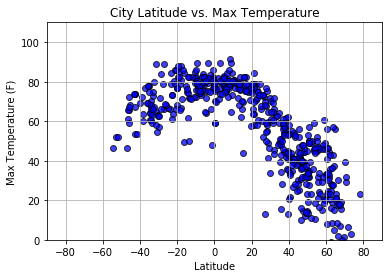

In [15]:
#create a latitude vs. temperature scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Max Temp"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 110)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save figure
plt.savefig("Images/latVStemp.png")

#### Latitude vs. Humidity Plot

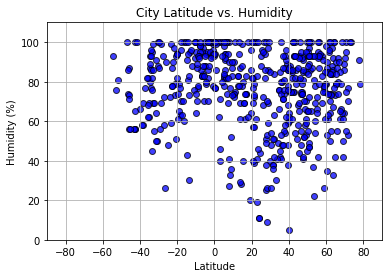

In [16]:
#create a latitude vs. humidity scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Humidity"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 110)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save figure
plt.savefig("Images/latVShumidity.png")

#### Latitude vs. Cloudiness Plot

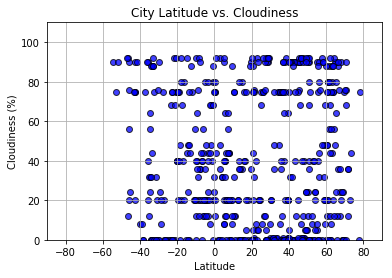

In [17]:
#create a latitude vs. cloudiness scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Cloudiness"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 110)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save figure
plt.savefig("Images/latVScloudiness.png")

#### Latitude vs. Wind Speed Plot

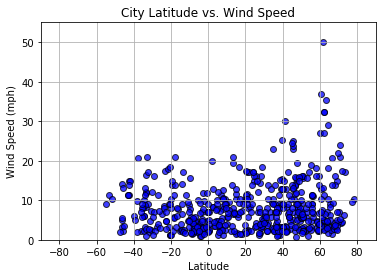

In [18]:
#create a latitude vs. wind speed scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Wind Speed"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 55)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save figure
plt.savefig("Images/latVSwindspeed.png")